In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import plotly.express as px
import datetime
%matplotlib inline

from imblearn.over_sampling import SMOTE
from collections import Counter

------------------------------------------------------------------------------------------------------------
### Questions

#### 1. What are the vaccination and registration rates per state in Malaysia?
*a. Can use histogram + line graph (not observing rate)* <br />

#### 2. What the types and total number of side effects of each type of vaccine ?
*a. Rate of side effect in dose one and dose 2*    <br />
*b. Rate of serious side effect for each vaccine*   <br />
*c. Death rate compare with rate of serious side effect*   <br />

#### 3. Which type of vaccine is given to more people?


-------------------------------------------------------------------------------------------------------------

In [43]:
import pickle

aefi = pickle.load(open('pickle_files/aefi.pkl', 'rb'))
aefi_serious = pickle.load(open('pickle_files/aefi_serious.pkl', 'rb'))
vax_malaysia = pickle.load(open('pickle_files/vax_malaysia.pkl', 'rb'))
vax_state = pickle.load(open('pickle_files/vax_state.pkl', 'rb'))
vaxreg_malaysia = pickle.load(open('pickle_files/vaxreg_malaysia.pkl', 'rb'))
vaxreg_state = pickle.load(open('pickle_files/vaxreg_state.pkl', 'rb'))
vax_state = pickle.load(open('pickle_files/vax_state.pkl', 'rb'))
cases_malaysia = pickle.load(open('pickle_files/cases_malaysia.pkl', 'rb'))
cases_state = pickle.load(open('pickle_files/cases_state.pkl', 'rb'))
deaths_malaysia = pickle.load(open('pickle_files/deaths_malaysia.pkl', 'rb'))
ppl = pd.read_csv('dataset/static/population_moh.csv')

**1. What are the vaccination and registration ratio per state in Malaysia?**

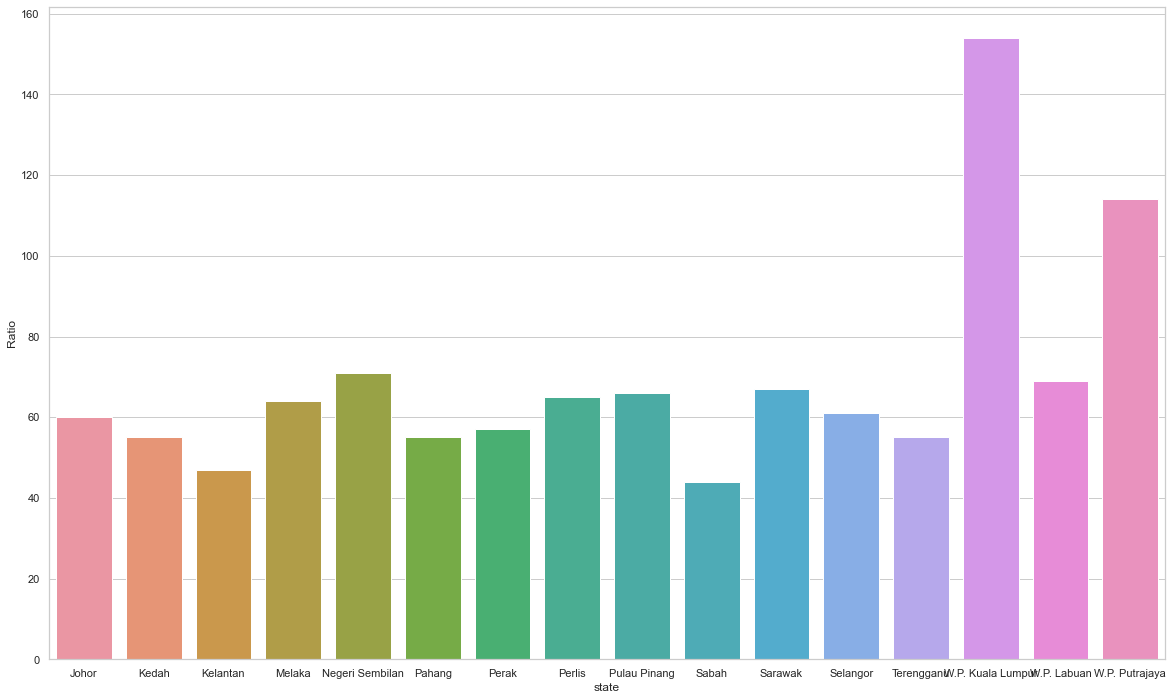

In [44]:
plt.figure(figsize=(20,12))
df = vax_state.groupby('state')['cumul_full'].max()
column = df.keys()
state = []
ratio = []
for i in column:
    ppl_num = ppl[ppl['state']==i]['pop']
    vax_num = vax_state[vax_state['state']==i]['cumul_full'].max()
    cal = int(vax_num/ppl_num * 100)
    state.append(i)
    ratio.append(cal)
df = pd.DataFrame(ratio)
df['state'] = state
df.rename(columns={0:'Ratio'},inplace=True)
ax = sns.barplot(data = df,x='state',y='Ratio')

In [45]:
ppl

,state,idxs,pop,pop_18,pop_60,pop_12
0,Malaysia,0,32657400,23409600,3502000,3147500
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500
5,Negeri Sembilan,5,1128800,814400,145000,109400
6,Pahang,6,1678700,1175800,190200,173000
7,Pulau Pinang,7,1773600,1367200,239200,141500
8,Perak,8,2510300,1862700,397300,237200
9,Perlis,9,254900,181200,35100,23100


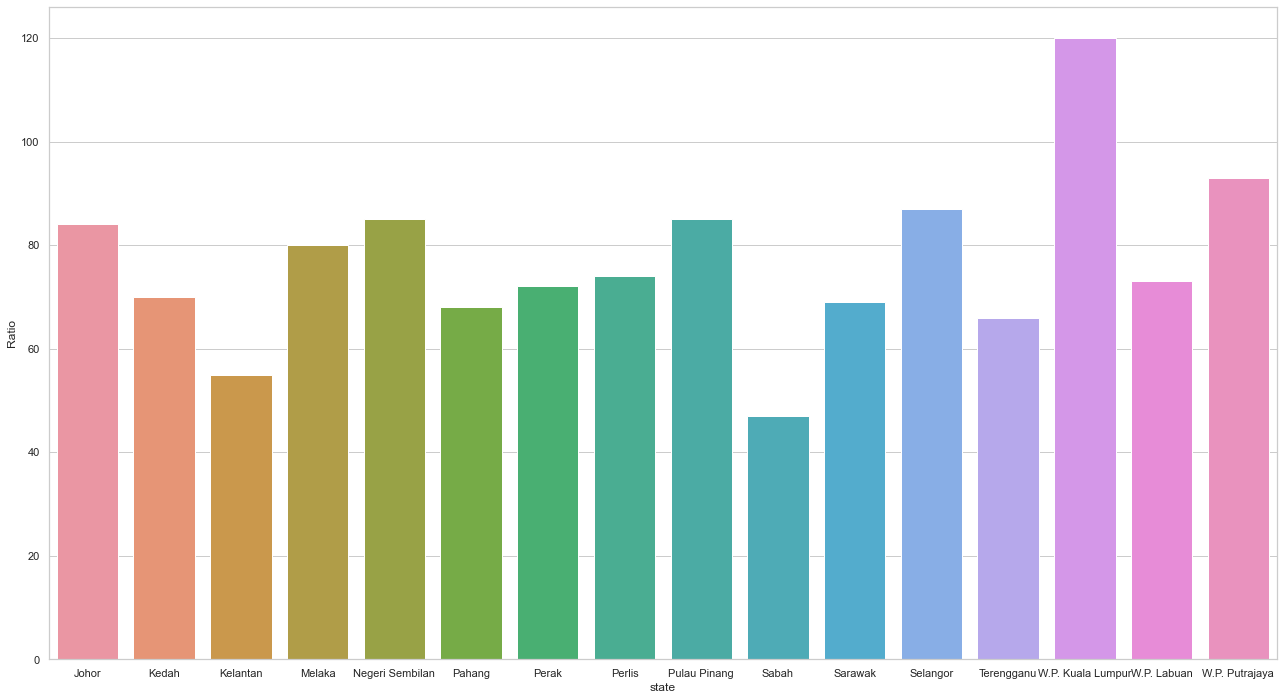

In [46]:
plt.figure(figsize=(22,12))
df = vaxreg_state.groupby('state')['total'].max()
column = df.keys()
state = []
ratio = []
for i in column:
    ppl_num = ppl[ppl['state']==i]['pop']
    vax_num = vaxreg_state[vaxreg_state['state']==i]['total'].max()
    cal = vax_num/ppl_num * 100
    state.append(i)
    ratio.append(int(cal))
df = pd.DataFrame(data=ratio,index=state)
df.reset_index(inplace=True)
df.rename(columns={'index':'state',0:'Ratio'},inplace=True)
ax = sns.barplot(data=df,x='state',y='Ratio') 

**2. What the types and total number of side effects of each type of vaccine ?**

In [47]:
death_rate = deaths_malaysia['deaths_new'].sum() / ppl[ppl['state']=='Malaysia']['pop']
death_rate = death_rate * 100
death_rate[0]

0.08229681481073202

In [52]:
vax_malaysia

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
0,2021-02-24,60,0,60,0,0,60,0,60,0,0,60,0,0,0,0,0,0,0
1,2021-02-25,1146,0,1146,0,0,1206,0,1206,0,0,1146,0,0,0,0,0,0,0
2,2021-02-26,4115,1,4116,0,0,5321,1,5322,0,0,4115,1,0,0,0,0,0,0
3,2021-02-27,6723,1,6724,0,0,12044,2,12046,0,0,6723,1,0,0,0,0,0,0
4,2021-02-28,6699,3,6702,0,0,18743,5,18748,0,0,6699,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-10-01,103021,134224,237245,87734,19005,23645337,20389622,43933988,1586008,71779,97848,82203,2090,13476,91,33649,1339,6549
220,2021-10-02,89695,121822,211517,80123,21170,23736676,20511444,44145505,1666131,92949,85634,73484,1907,13712,116,32558,1644,2462
221,2021-10-03,96024,110550,206574,85703,15877,23833382,20621994,44352079,1751834,108826,87792,66883,1907,9508,18,33146,682,6638
222,2021-10-04,126433,95379,221812,110565,5298,23961163,20717373,44573891,1862399,114124,123351,58454,2620,8339,144,26749,1348,807


In [54]:
df = aefi_serious.groupby('vaxtype').sum()
df = df['suspected_anaphylaxis'] + df['acute_facial_paralysis'] +  df['venous_thromboembolism'] + df['myo_pericarditis']
serious_effect_rate = {}
column = df.keys()
for i in column:
    num = df[i] / vax_malaysia['cumul'].max() * 100
    serious_effect_rate[i] = float(num)

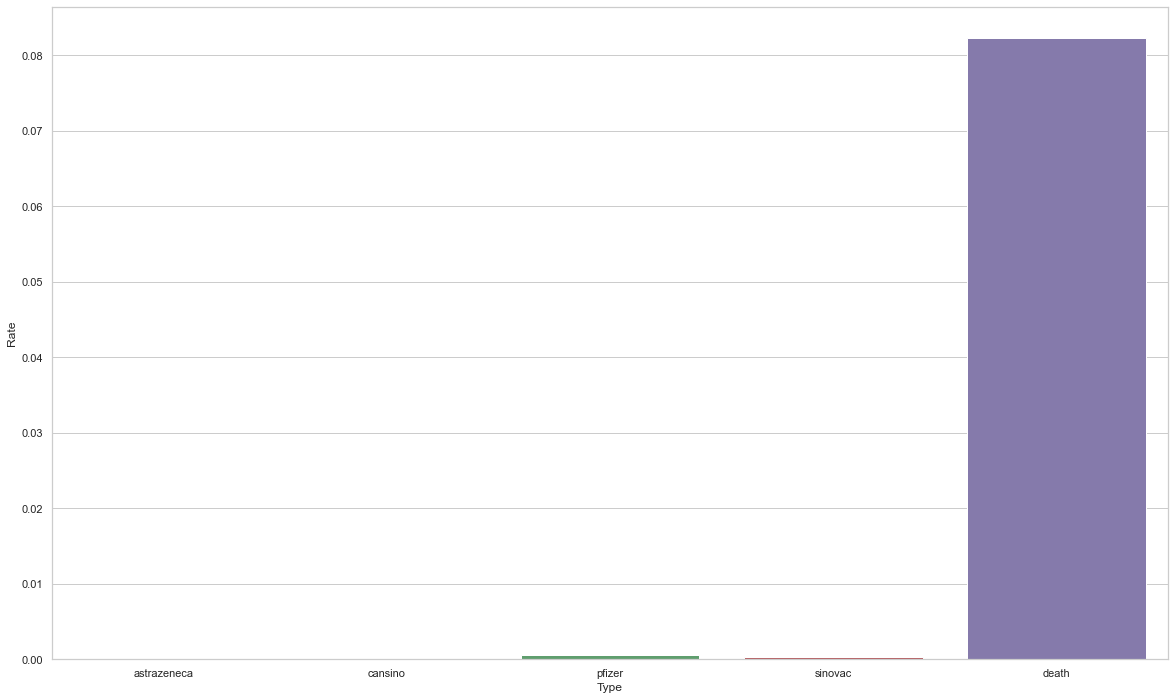

In [55]:
plt.figure(figsize=(20,12))
series = pd.Series(serious_effect_rate)
df = pd.DataFrame(series)
df.reset_index(inplace=True)
df.rename(columns={'index':'Type',0:'Rate'},inplace=True)
death = {'Type':'death','Rate':0.082296}
df = df.append(death,ignore_index=True)
ax = sns.barplot(data = df,x='Type',y='Rate')  

In [56]:
df

,Type,Rate
0,astrazeneca,0.000067
1,cansino,0.000000
2,pfizer,0.000560
3,sinovac,0.000321
4,death,0.082296


In [68]:
df = aefi[['vaxtype','d1_site_pain','d1_site_swelling','d1_site_redness','d1_tiredness','d1_headache','d1_muscle_pain','d1_joint_pain','d1_weakness', 'd1_fever','d1_vomiting','d1_chills','d1_rash','d2_site_pain','d2_site_swelling','d2_site_redness','d2_tiredness','d2_headache','d2_muscle_pain','d2_joint_pain','d2_weakness', 'd2_fever','d2_vomiting','d2_chills','d2_rash']].copy()
df = df.groupby('vaxtype').sum()
df3 = aefi_serious.groupby('vaxtype').sum()
fig1 = px.bar(df,barmode='group',title = 'side effect of each vaccine in dose 1')
fig3 = px.bar(df3,barmode='group',title = 'serious side effect of each vaccine')
fig1.show()
fig3.show()

**3. Which type of vaccine is given to more people?**

<Figure size 1584x864 with 0 Axes>

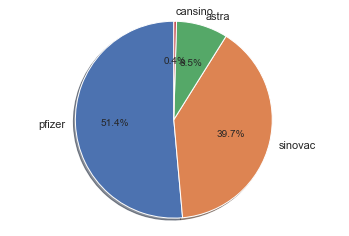

In [75]:
plt.figure(figsize=(22,12))
fig1, ax1 = plt.subplots()
df = vax_malaysia[['pfizer1','sinovac1','astra1','cansino']]
df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
df = df.sum()
df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns={'index':'vaxtype',0:'total'})
ax1.pie(df['total'], labels=df['vaxtype'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
#fig = px.pie(df, values='total', names='vaxtype',title='Rate of each vaccine in Malaysia',color_discrete_sequence=px.colors.sequential.RdBu)
#fig.show()

In [10]:
#df = vax_state[['state','pfizer1','sinovac1','astra1','cansino']]
#df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
#df = df.groupby('state').sum()
#df_tr = df.transpose()
#df_tr = df_tr.reset_index()
#df_tr = df_tr.rename(columns={'index':'vaxtype'})
#columns = df_tr.drop('vaxtype',axis=1).columns
#df_tr

#for i in columns:
#    fig = px.pie(df_tr['i'], values='total', names='vaxtype',title='Rate of each vaccine in Malaysia',color_discrete_sequence=px.colors.sequential.RdBu)
#    fig.show()

In [11]:
df = vax_state[['state','pfizer1','sinovac1','astra1','cansino']]
df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
df = df.groupby('state').sum()
fig = px.bar(df,barmode='group',title = 'Vaccine in each state')
fig.show()

### Extra EDA

**Has vaccination helped reduced the daily cases?**

In [12]:
vax_malaysia['cumul_full'].max()

20819254

In [13]:
ppl.head()

,state,idxs,pop,pop_18,pop_60,pop_12
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500
5,Negeri Sembilan,5,1128800,814400,145000,109400


In [14]:
ppl[ppl['state']=='Malaysia']['pop']

Series([], Name: pop, dtype: int64)

In [15]:
rate = (20819254/32657400) * 100
rate

63.75049452803959

In [16]:
cases_malaysia.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly
0,2020-01-25,4,4,0,4,0,0,0,0,0,1,0
1,2020-01-26,0,0,0,4,0,0,0,0,0,0,0
2,2020-01-27,0,0,0,4,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,4,0,0,0,0,0,0,0
4,2020-01-29,3,3,0,7,0,0,0,1,0,2,0


In [17]:
cases_malaysia = cases_malaysia[cases_malaysia['date']>='2021-02-24']

In [18]:
print(len(vax_malaysia))
print(len(cases_malaysia))

224
224


In [19]:
print(vax_malaysia['date'].max())
print(cases_malaysia['date'].max())

2021-10-05 00:00:00
2021-10-05


In [20]:
vax_malaysia['year'] = pd.DatetimeIndex(vax_malaysia['date']).year
vax_malaysia['month'] = pd.DatetimeIndex(vax_malaysia['date']).month
cases_malaysia['year'] = pd.DatetimeIndex(cases_malaysia['date']).year
cases_malaysia['month'] = pd.DatetimeIndex(cases_malaysia['date']).month

In [21]:
df = vax_malaysia.groupby(['month']).max()
df2 = cases_malaysia.groupby(['month']).sum()

In [22]:
df = df.reset_index()
df2 = df2.reset_index()

In [23]:
fig = px.line(df, x="month", y="cumul_full")
fig.show()

In [24]:
fig = px.line(df2, x="month", y="cases_new")
fig.show()

In [25]:
df[df['month']==8]['cumul_full']

6    15138379
Name: cumul_full, dtype: int64

In [26]:
rate = (15138379/32657400) * 100
rate

46.35512625009952

**Achieve 80% of vaccinated rate can help reduce covid cases?**

**What states have shown the effect of vaccination?**

In [27]:
cases_state['state'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [28]:
cases_state = cases_state[cases_state['date']>='2021-02-24']


In [29]:
print(len(vax_state))
print(len(cases_state))

3584
3584


In [30]:
cases_state = cases_state[cases_state['state']=='W.P. Labuan']
vax_state = vax_state[vax_state['state']=='W.P. Labuan']

In [31]:
print(vax_state['date'].max())
print(cases_state['date'].max())

2021-10-05 00:00:00
2021-10-05


In [32]:
vax_state['month'] = pd.DatetimeIndex(vax_state['date']).month
cases_state['month'] = pd.DatetimeIndex(cases_state['date']).month

In [33]:
df = vax_state.groupby(['month']).max()
df2 = cases_state.groupby(['month']).sum()

In [34]:
df = df.reset_index()
df2 = df2.reset_index()

In [35]:
fig = px.line(df, x="month", y="cumul_full")
fig.show()

In [36]:
fig = px.line(df2, x="month", y="cases_new")
fig.show()

In [37]:
cases_malaysia

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,year,month
396,2021-02-24,3545,1,3331,30572,2483,0,0,145,84,2919,173,2021,2
397,2021-02-25,1924,6,3752,28738,705,0,0,158,72,1473,155,2021,2
398,2021-02-26,2253,7,3085,27903,1136,0,0,124,75,1822,173,2021,2
399,2021-02-27,2364,1,3320,26937,1100,0,0,147,100,1858,162,2021,2
400,2021-02-28,2437,1,3251,26118,1404,0,0,132,83,2044,113,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2021-10-01,11889,14,15891,160144,868,1475,6577,2081,921,7473,1277,2021,10
616,2021-10-02,10915,7,15396,155578,656,1303,5882,1951,938,6756,1166,2021,10
617,2021-10-03,9066,12,14454,150146,388,1119,4941,1700,764,5348,1087,2021,10
618,2021-10-04,8075,6,15456,142746,731,1093,4282,1353,641,5050,948,2021,10


**Which states require more attendtion?**

# Questions for Clustering, Classification, Regression (Not only for vaccination dataset)

#### Clustering
* Which states suffer in covid-19
* Which cluster is high risk cluster


#### Regression
* Which date Sarawak can achives Phase 4
* Rate of fully vacinated

#### Classification (???)

# Reference

Clustering: https://www.kaggle.com/ashydv/country-clustering-hierarchical-clustering-pca/notebook